In [7]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, HTML

In [8]:
# Load data for analysis
preprocessed_data=pd.read_csv('../Data/PreProcessedData.csv')

display(HTML('<span style="font-weight:bold;">Data Shape:</span> ' + str(preprocessed_data.shape)))
display(HTML('<span style="font-weight:bold;">Data Overview:</span>'))
print(f"Total Variables: {len(preprocessed_data.columns)}")
print(f"Categorical Variables: {len([col for col in preprocessed_data.columns if col not in ['age', 'wgt']])} (Binary/Cardinal/Ordinal)")
print(f"Continuous Variables: {len(['age'])} (Age)")
print(f"Survey Weights: wgt")

display(HTML('<span style="font-weight:bold;">Data Preview:</span>'))
display(preprocessed_data.head().style.set_table_styles([{'selector': 'th.row_heading', 'props': [('min-width', '50px')]}]))
display(preprocessed_data.tail().style.set_table_styles([{'selector': 'th.row_heading', 'props': [('min-width', '50px')]}]))

display(HTML('<span style="font-weight:bold;">Data Info:</span>'))

info_table = pd.DataFrame({
    'Variables': preprocessed_data.columns,
    'Dtype': preprocessed_data.dtypes,
    'Unique Values': preprocessed_data.nunique(),
    'Null Values (%)': (preprocessed_data.isnull().sum().to_numpy() * 100 / len(preprocessed_data)).round(2)
})
info_table.index = pd.RangeIndex(start=1, stop=len(info_table) + 1)
info_table

Total Variables: 18
Categorical Variables: 16 (Binary/Cardinal/Ordinal)
Continuous Variables: 1 (Age)
Survey Weights: wgt


,wgt,gender,age,ed_lvl,income_q,employed,rural,account,savings,loans,wages,transfers,pension,agri_sale,utilities,remittances,mobile,internet
0,0.330000,1,18,3,3,2,1,1,0,0,4,4,4,4,2,5,1,1
1,1.330000,2,41,1,1,2,2,1,0,0,4,4,4,4,1,5,2,2
2,1.460000,2,23,1,2,1,2,1,0,1,2,4,4,4,2,5,1,2
3,0.390000,1,17,2,2,2,1,1,0,0,4,4,4,4,4,5,1,2
4,2.420000,2,27,1,1,1,2,1,1,0,4,3,4,4,3,5,2,2


,wgt,gender,age,ed_lvl,income_q,employed,rural,account,savings,loans,wages,transfers,pension,agri_sale,utilities,remittances,mobile,internet
2995,2.110000,2,65,1,1,1,2,1,0,1,1,3,4,4,4,5,1,2
2996,0.700000,2,32,1,5,1,2,1,0,0,4,4,4,4,2,1,1,1
2997,1.610000,2,18,2,2,1,2,0,0,0,4,4,4,4,4,5,1,2
2998,0.840000,2,36,2,4,1,2,1,0,1,4,4,4,4,2,5,1,1
2999,0.920000,2,48,3,5,1,2,1,1,0,4,3,4,4,4,4,1,1


,Variables,Dtype,Unique Values,Null Values (%)
1,wgt,float64,212,0.0
2,gender,int64,2,0.0
3,age,int64,70,0.0
4,ed_lvl,int64,5,0.0
5,income_q,int64,5,0.0
6,employed,int64,2,0.0
7,rural,int64,2,0.0
8,account,int64,2,0.0
9,savings,int64,2,0.0
10,loans,int64,2,0.0


**Insights:**
1. 
1. Transformation and dealing with outliers can be required for continuous variable(age).
2. Cardinal categorical variables can be target or one-hot encoded depending on rare categories.
3. Ordinal and binary categorical variables would not require encding or transformation.

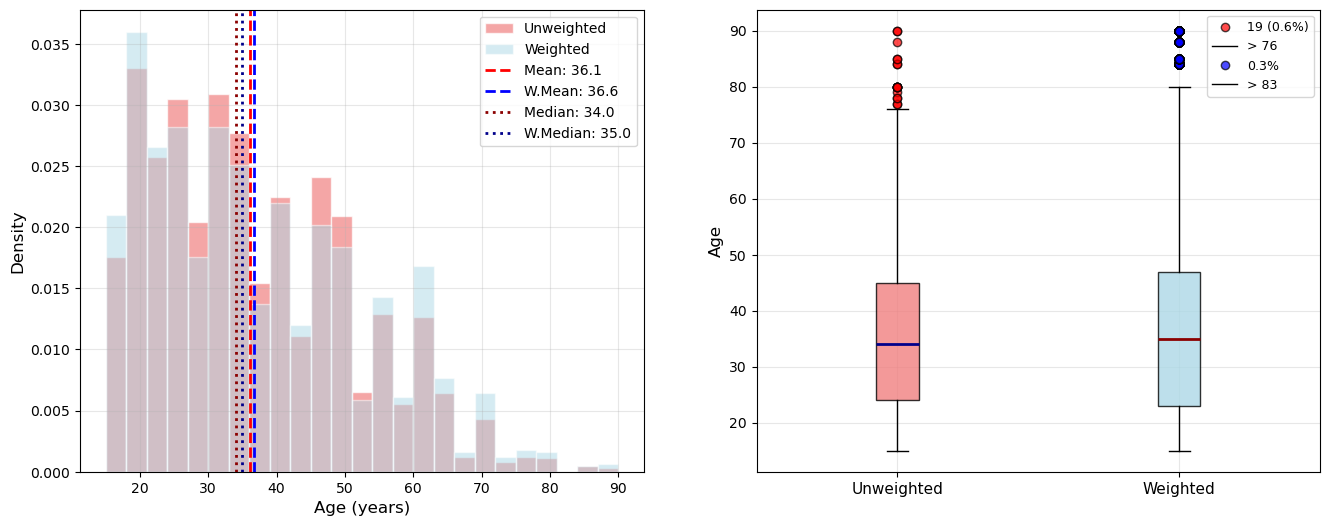

In [ ]:
# Continuous Variable Analysis (Age)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Histogram (Distribution)
age_data = preprocessed_data['age']
weights = preprocessed_data['wgt']
wt_age_data = np.repeat(age_data, np.round(weights * 100).astype(int))

ax1.hist(age_data, bins=25, alpha=0.7, color='lightcoral', edgecolor='white', density=True, label='Unweighted')
ax1.hist(age_data, bins=25, weights=weights, density=True, alpha=0.5, color='lightblue', edgecolor='white', label='Weighted')
ax1.axvline(age_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {age_data.mean():.1f}')
ax1.axvline(np.average(age_data, weights=weights), color='blue', linestyle='--', linewidth=2, label=f'W.Mean: {np.average(age_data, weights=weights):.1f}')
ax1.axvline(age_data.median(), color='darkred', linestyle=':', linewidth=2, label=f'Median: {age_data.median():.1f}')
ax1.axvline(np.median(wt_age_data), color='darkblue', linestyle=':', linewidth=2, label=f'W.Median: {np.median(wt_age_data):.1f}')

ax1.set_xlabel('Age (years)', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)

ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Box-Plot (Outlier)
Q1, Q3 = age_data.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = age_data[(age_data < lower_limit) | (age_data > upper_limit)]
outlier_pct = (len(outliers) / len(age_data)) * 100

# Weighted IQR and outliers (using repeated data)
Q1_wt, Q3_wt = np.percentile(wt_age_data, [25, 75])
IQR_wt = Q3_wt - Q1_wt
lower_limit_wt = Q1_wt - 1.5 * IQR_wt
upper_limit_wt = Q3_wt + 1.5 * IQR_wt

wt_outliers = wt_age_data[(wt_age_data < lower_limit_wt) | (wt_age_data > upper_limit_wt)]
wt_outlier_pct = (len(wt_outliers) / len(wt_age_data)) * 100

bp = ax2.boxplot(age_data, positions=[1], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.8), medianprops=dict(color='darkblue', linewidth=2), flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.7))
bp_wt = ax2.boxplot(wt_age_data, positions=[2], patch_artist=True, boxprops=dict(facecolor='lightblue', alpha=0.8), medianprops=dict(color='darkred', linewidth=2), flierprops=dict(marker='o', markerfacecolor='blue', markersize=6, alpha=0.7))
ax2.legend([bp["fliers"][0], bp["whiskers"][1],bp_wt["fliers"][0], bp_wt["whiskers"][1]],[f'{len(outliers)} ({outlier_pct:.1f}%)',f'> {upper_limit:.0f}',f'{wt_outlier_pct:.1f}%',f'> {upper_limit_wt:.0f}'],loc='upper right', fontsize=9)
ax2.set_xticks([1, 2])
ax2.set_xticklabels(['Unweighted', 'Weighted'], fontsize=11)
ax2.set_ylabel('Age', fontsize=12)
ax2.grid(True, alpha=0.3)

**Insights:**
1. Outliers in sample are of above 76 years of age, and hence is also slightly right skewed. 
2. They can be ommited, as they exceed average lifespan(72) and also India has young economy.
3. The sample data is very close with the weighted sample data representing the population.
4. Use transformation for normalisation if skewness persists even after trimming outliers.

**Notes:**

Trim the outliers. (Age>76)

In [13]:
# Trim Outliers and Check for Skewness
trimmed_data = preprocessed_data[preprocessed_data['age'] <= 76].copy()
display(HTML('<span style="font-weight:bold;">Data Shape:</span> ' + str(preprocessed_data.shape)))

age_data = trimmed_data['age']
weights = trimmed_data['wgt']
wt_age_data = np.repeat(age_data, np.round(weights * 100).astype(int))

print(f"Unweighted Skewness: {stats.skew(age_data):.3f}")
print(f"Weighted Skewness: {stats.skew(wt_age_data):.3f}")

Unweighted Skewness: 0.557
Weighted Skewness: 0.549


**Insights:**
1. Skewness is very mild, square root transformation is best suited because skewness if very mild and there is less infomration loss from transformation.

**Notes:**

Apply Square root transformation to age variable.

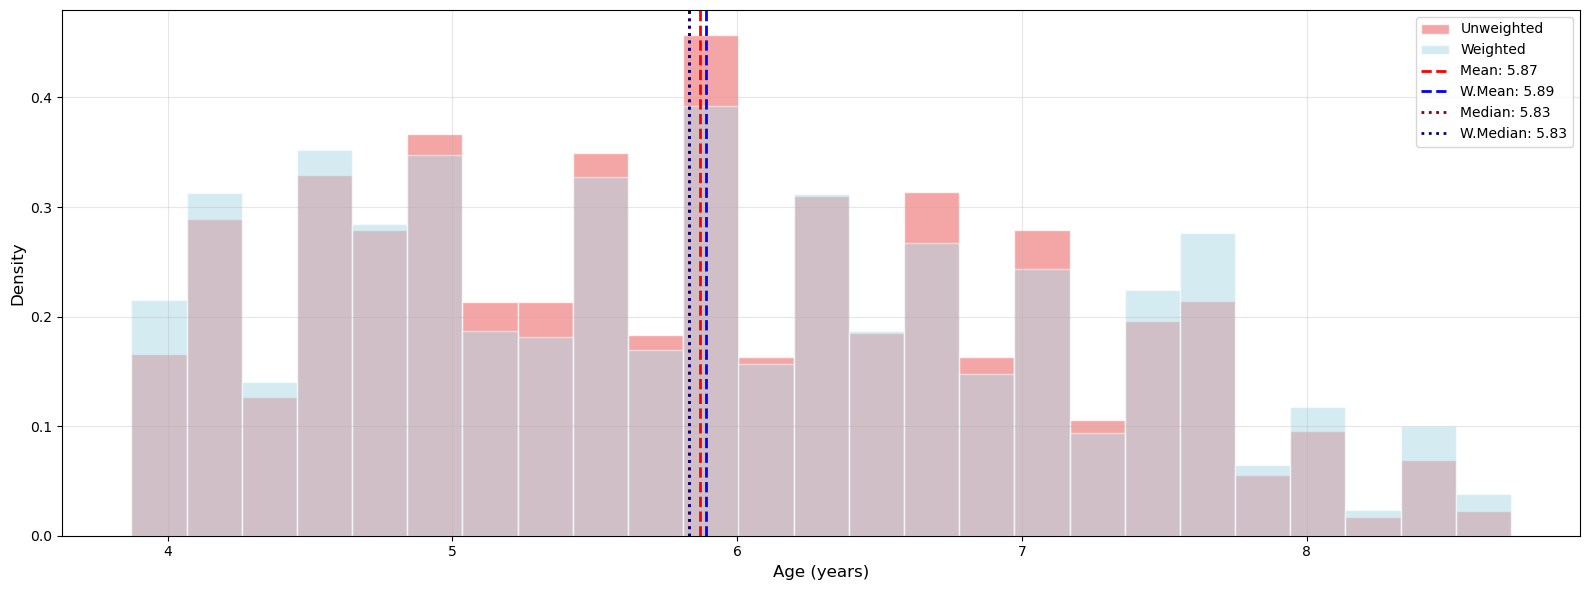

Unweighted Skewness: 0.244
Weighted Skewness: 0.253


In [ ]:
# Apply Square Root Transformation and Check for Skewness
transformed_data=trimmed_data.copy()
transformed_data['age_sqrt'] = np.sqrt(transformed_data['age'])

age_data = trimmed_data['age_sqrt']
weights = trimmed_data['wgt']
wt_age_data = np.repeat(age_data, np.round(weights * 100).astype(int))

# 1. Histogram (Distribution)
plt.figure(figsize=(16, 6))
plt.hist(age_data, bins=25, alpha=0.7, color='lightcoral', edgecolor='white', density=True, label='Unweighted')
plt.hist(age_data, bins=25, weights=weights, density=True, alpha=0.5, color='lightblue', edgecolor='white', label='Weighted')
plt.axvline(age_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {age_data.mean():.2f}')
plt.axvline(float(np.average(age_data, weights=weights)), color='blue', linestyle='--', linewidth=2, label=f'W.Mean: {float(np.average(age_data, weights=weights)):.2f}')
plt.axvline(age_data.median(), color='darkred', linestyle=':', linewidth=2, label=f'Median: {age_data.median():.2f}')
plt.axvline(float(np.median(wt_age_data)), color='darkblue', linestyle=':', linewidth=2, label=f'W.Median: {float(np.median(wt_age_data)):.2f}')

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Unweighted Skewness: {stats.skew(age_data):.3f}")
print(f"Weighted Skewness: {stats.skew(wt_age_data):.3f}")

**Insights:**
1. Distibution is fairly symmetrical now. (skewness-0.25)
2. Check for oridinal/ cardinal categorical variables and class distributioin.

In [ ]:
# Categorical variables Analysis

# Create comprehensive class balance visualization
n_categorical = len(categorical_vars)
n_cols = 4
n_rows = int(np.ceil(n_categorical / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()

class_balance_summary = {}

for idx, col in enumerate(categorical_vars):
    if idx >= len(axes):
        break
        
    # Get value counts (unweighted and weighted)
    col_data = preproccesed_data[col].dropna()
    unweighted_counts = col_data.value_counts().sort_index()
    
    # Calculate weighted counts
    col_weights = preproccesed_data.loc[col_data.index, 'wgt']
    weighted_counts = col_data.groupby(col_data).apply(lambda x: col_weights[x.index].sum()).sort_index()
    weighted_props = weighted_counts / weighted_counts.sum() * 100
    unweighted_props = unweighted_counts / unweighted_counts.sum() * 100
    
    # Determine if binary or multi-class
    n_classes = len(unweighted_counts)
    is_binary = n_classes == 2
    
    # Calculate balance metrics
    if is_binary:
        # For binary: calculate minority class percentage
        balance_metric = min(weighted_props.values)
        balance_status = 'Balanced' if balance_metric >= 40 else 'Moderately Imbalanced' if balance_metric >= 20 else 'Severely Imbalanced'
    else:
        # For multi-class: calculate coefficient of variation
        balance_metric = weighted_props.std() / weighted_props.mean() * 100
        balance_status = 'Balanced' if balance_metric <= 50 else 'Moderately Imbalanced' if balance_metric <= 100 else 'Severely Imbalanced'
    
    class_balance_summary[col] = {
        'n_classes': n_classes,
        'type': 'Binary' if is_binary else 'Multi-class',
        'balance_metric': balance_metric,
        'balance_status': balance_status,
        'weighted_entropy': -sum((p/100) * np.log2(p/100) for p in weighted_props if p > 0),
        'class_distribution': dict(weighted_props)
    }
    
    # Create visualization
    x_pos = range(len(weighted_props))
    width = 0.35
    
    bars1 = axes[idx].bar([p - width/2 for p in x_pos], unweighted_props.values, width,
                         label='Unweighted', alpha=0.7, color='lightcoral')
    bars2 = axes[idx].bar([p + width/2 for p in x_pos], weighted_props.values, width,
                         label='Weighted', alpha=0.7, color='lightblue')
    
    axes[idx].set_title(f'{col}\n{balance_status} ({n_classes} classes)', fontsize=10, pad=8)
    axes[idx].set_xlabel('Classes', fontsize=9)
    axes[idx].set_ylabel('Percentage (%)', fontsize=9)
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels([f'Class {i}' for i in weighted_props.index], fontsize=8)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='both', labelsize=8)
    
    # Add percentage labels on bars
    for bar1, bar2, val1, val2 in zip(bars1, bars2, unweighted_props.values, weighted_props.values):
        if val1 > 5:  # Only label if > 5%
            axes[idx].text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 0.5,
                          f'{val1:.1f}%', ha='center', va='bottom', fontsize=7)
        if val2 > 5:
            axes[idx].text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 0.5,
                          f'{val2:.1f}%', ha='center', va='bottom', fontsize=7)

# Hide empty subplots
for idx in range(len(categorical_vars), len(axes)):
    axes[idx].set_visible(False)

fig.suptitle('Categorical Variables - Class Balance Analysis', fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Display class balance summary
balance_df = pd.DataFrame.from_dict(class_balance_summary, orient='index')
balance_df = balance_df.drop(columns=['class_distribution']).round(3)

display(HTML('<span style="font-weight:bold; font-size:16px;">Class Balance Summary</span>'))
styled_balance = balance_df.style.format({
    'balance_metric': '{:.2f}',
    'weighted_entropy': '{:.3f}'
}).background_gradient(subset=['weighted_entropy'], cmap='YlOrRd')\
  .applymap(lambda x: 'background-color: lightgreen' if x == 'Balanced' 
            else 'background-color: yellow' if x == 'Moderately Imbalanced' 
            else 'background-color: lightcoral' if x == 'Severely Imbalanced' else '', 
            subset=['balance_status'])

display(styled_balance)

NameError: name 'categorical_vars' is not defined

In [ ]:
# 3. CORRELATION MATRIX ANALYSIS

# Prepare data for correlation analysis
correlation_data = preproccesed_data.drop(columns=['wgt']).copy()  # Exclude weights from correlation

# Calculate weighted correlation matrix
def weighted_correlation_matrix(df, weights):
    """Calculate correlation matrix using survey weights"""
    cols = df.columns
    n = len(cols)
    corr_matrix = np.zeros((n, n))
    
    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            if i == j:
                corr_matrix[i, j] = 1.0
            elif i < j:  # Only calculate upper triangle
                # Remove NaN values
                mask = ~(pd.isna(df[col1]) | pd.isna(df[col2]))
                x = df.loc[mask, col1].values
                y = df.loc[mask, col2].values
                w = weights[mask]
                
                if len(x) > 1:
                    # Weighted correlation
                    w_mean_x = np.average(x, weights=w)
                    w_mean_y = np.average(y, weights=w)
                    
                    numerator = np.average((x - w_mean_x) * (y - w_mean_y), weights=w)
                    var_x = np.average((x - w_mean_x)**2, weights=w)
                    var_y = np.average((y - w_mean_y)**2, weights=w)
                    
                    if var_x > 0 and var_y > 0:
                        corr = numerator / np.sqrt(var_x * var_y)
                        corr_matrix[i, j] = corr
                        corr_matrix[j, i] = corr
    
    return pd.DataFrame(corr_matrix, index=cols, columns=cols)

# Calculate both weighted and unweighted correlations
weights_clean = preproccesed_data['wgt'].values
unweighted_corr = correlation_data.corr()
weighted_corr = weighted_correlation_matrix(correlation_data, weights_clean)

# Create side-by-side correlation heatmaps
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Unweighted correlation
mask = np.triu(np.ones_like(unweighted_corr, dtype=bool))
sns.heatmap(unweighted_corr, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=ax1, fmt='.3f',
            annot_kws={'fontsize': 8})
ax1.set_title('Unweighted Correlation Matrix', fontsize=14, pad=15)
ax1.tick_params(axis='both', labelsize=9)

# Weighted correlation
sns.heatmap(weighted_corr, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=ax2, fmt='.3f',
            annot_kws={'fontsize': 8})
ax2.set_title('Weighted Correlation Matrix', fontsize=14, pad=15)
ax2.tick_params(axis='both', labelsize=9)

# Difference matrix
corr_diff = np.abs(weighted_corr - unweighted_corr)
sns.heatmap(corr_diff, mask=mask, annot=True, cmap='Reds', 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=ax3, fmt='.3f',
            annot_kws={'fontsize': 8})
ax3.set_title('Absolute Difference\n|Weighted - Unweighted|', fontsize=14, pad=15)
ax3.tick_params(axis='both', labelsize=9)

plt.tight_layout()
plt.show()

# Identify high correlations
def find_high_correlations(corr_matrix, threshold=0.5):
    """Find variable pairs with correlation above threshold"""
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) >= threshold:
                high_corr_pairs.append({
                    'Variable_1': corr_matrix.columns[i],
                    'Variable_2': corr_matrix.columns[j],
                    'Correlation': corr_val,
                    'Abs_Correlation': abs(corr_val)
                })
    return pd.DataFrame(high_corr_pairs).sort_values('Abs_Correlation', ascending=False)

# Find high correlations in both matrices
high_corr_unweighted = find_high_correlations(unweighted_corr, 0.3)
high_corr_weighted = find_high_correlations(weighted_corr, 0.3)

display(HTML('<span style="font-weight:bold; font-size:14px;">High Correlations (|r| ≥ 0.3)</span>'))

if not high_corr_weighted.empty:
    display(HTML('<span style="font-weight:bold;">Weighted Correlations:</span>'))
    styled_weighted_corr = high_corr_weighted.style.format({
        'Correlation': '{:.3f}',
        'Abs_Correlation': '{:.3f}'
    }).background_gradient(subset=['Abs_Correlation'], cmap='Reds')
    display(styled_weighted_corr)
else:
    print("No high correlations found (threshold: |r| ≥ 0.3)")

# Correlation strength analysis
corr_values = weighted_corr.values[np.triu_indices_from(weighted_corr.values, k=1)]
corr_abs_values = np.abs(corr_values)

# Categorize correlations
weak_corr = sum(corr_abs_values < 0.3)
moderate_corr = sum((corr_abs_values >= 0.3) & (corr_abs_values < 0.7))
strong_corr = sum(corr_abs_values >= 0.7)

print(f"\nCorrelation Strength Distribution (Weighted):")
print(f"Weak correlations (|r| < 0.3): {weak_corr}")
print(f"Moderate correlations (0.3 ≤ |r| < 0.7): {moderate_corr}")
print(f"Strong correlations (|r| ≥ 0.7): {strong_corr}")
print(f"Total variable pairs: {len(corr_values)}")

In [ ]:
# 4. FEATURE ENGINEERING RECOMMENDATIONS

# Age scaling and transformation recommendations
age_data = preproccesed_data['age'].dropna()
weighted_age_stats = weighted_stats(age_data.values, preproccesed_data['wgt'][preproccesed_data['age'].notna()].values)

# Determine age preprocessing recommendations
age_skew = weighted_age_stats['weighted_skew']
age_outlier_pct = weighted_age_stats['weighted_outlier_pct']

if abs(age_skew) > 1.0:
    age_transform = "Log transformation (strong skew)" if age_skew > 0 else "Square transformation (negative skew)"
elif abs(age_skew) > 0.5:
    age_transform = "Square root transformation (moderate skew)"
else:
    age_transform = "No transformation needed (approximately normal)"

if age_outlier_pct > 10:
    age_scaling = "RobustScaler (many outliers)"
elif abs(age_skew) > 0.5:
    age_scaling = "RobustScaler (skewed distribution)"
else:
    age_scaling = "StandardScaler or MinMaxScaler"

# Categorical variables encoding recommendations
encoding_recommendations = {}
for col in categorical_vars:
    n_classes = len(preproccesed_data[col].dropna().unique())
    balance_info = class_balance_summary[col]
    
    if col == 'account':  # Target variable
        encoding_rec = "Target variable - no encoding needed"
    elif n_classes == 2:
        encoding_rec = "Binary Encoding (0/1) or Label Encoding"
    elif n_classes <= 5 and balance_info['balance_status'] != 'Severely Imbalanced':
        encoding_rec = "One-Hot Encoding or Ordinal Encoding"
    elif n_classes > 5 or balance_info['balance_status'] == 'Severely Imbalanced':
        encoding_rec = "Target Encoding or Binary Encoding (rare classes)"
    else:
        encoding_rec = "One-Hot Encoding"
    
    encoding_recommendations[col] = {
        'n_classes': n_classes,
        'balance_status': balance_info['balance_status'],
        'encoding_recommendation': encoding_rec
    }

# Create comprehensive recommendations summary
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Age preprocessing pipeline
age_pipeline_steps = ['Original', 'Transformation', 'Scaling', 'Final']
age_pipeline_labels = ['Raw Age', age_transform.split(' (')[0], age_scaling.split(' (')[0], 'ML Ready']

ax1.barh(range(len(age_pipeline_steps)), [1, 1, 1, 1], 
         color=['lightblue', 'lightgreen', 'lightyellow', 'lightpink'], alpha=0.7)
ax1.set_yticks(range(len(age_pipeline_steps)))
ax1.set_yticklabels([f"{step}\n{label}" for step, label in zip(age_pipeline_steps, age_pipeline_labels)])
ax1.set_title('Age Variable Preprocessing Pipeline', fontsize=14, pad=15)
ax1.set_xlabel('Processing Steps', fontsize=12)
ax1.grid(True, alpha=0.3, axis='x')

# 2. Categorical variables encoding distribution
encoding_types = {}
for col, info in encoding_recommendations.items():
    if col != 'account':  # Exclude target
        enc_type = info['encoding_recommendation'].split(' or ')[0].split(' (')[0]
        encoding_types[enc_type] = encoding_types.get(enc_type, 0) + 1

ax2.pie(encoding_types.values(), labels=encoding_types.keys(), autopct='%1.1f%%',
        colors=['lightblue', 'lightgreen', 'lightyellow', 'lightpink'][:len(encoding_types)])
ax2.set_title('Categorical Encoding Methods Distribution', fontsize=14, pad=15)

# 3. Balance status overview
balance_counts = {}
for col, info in class_balance_summary.items():
    if col != 'account':  # Exclude target
        status = info['balance_status']
        balance_counts[status] = balance_counts.get(status, 0) + 1

bars = ax3.bar(balance_counts.keys(), balance_counts.values(),
               color=['lightgreen', 'yellow', 'lightcoral'], alpha=0.7)
ax3.set_title('Class Balance Status Distribution', fontsize=14, pad=15)
ax3.set_xlabel('Balance Status', fontsize=12)
ax3.set_ylabel('Number of Variables', fontsize=12)
ax3.grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for bar, count in zip(bars, balance_counts.values()):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 4. Feature engineering complexity assessment
complexity_scores = {}
for col in categorical_vars:
    if col != 'account':
        info = class_balance_summary[col]
        # Complexity based on number of classes and balance
        complexity = info['n_classes']
        if info['balance_status'] == 'Severely Imbalanced':
            complexity += 2
        elif info['balance_status'] == 'Moderately Imbalanced':
            complexity += 1
        complexity_scores[col] = complexity

# Sort by complexity
sorted_complexity = dict(sorted(complexity_scores.items(), key=lambda x: x[1], reverse=True))

bars = ax4.barh(range(len(sorted_complexity)), list(sorted_complexity.values()),
                color=['lightcoral' if v > 5 else 'yellow' if v > 3 else 'lightgreen' 
                       for v in sorted_complexity.values()], alpha=0.7)
ax4.set_yticks(range(len(sorted_complexity)))
ax4.set_yticklabels(list(sorted_complexity.keys()), fontsize=9)
ax4.set_title('Feature Engineering Complexity\n(Classes + Imbalance Penalty)', fontsize=14, pad=15)
ax4.set_xlabel('Complexity Score', fontsize=12)
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Display detailed recommendations
print("="*80)
print("COMPREHENSIVE FEATURE ENGINEERING RECOMMENDATIONS")
print("="*80)

print(f"\n🔢 AGE VARIABLE (Continuous):")
print(f"  Current Distribution: Mean={weighted_age_stats['weighted_mean']:.1f}, Std={weighted_age_stats['weighted_std']:.1f}")
print(f"  Skewness: {age_skew:.3f} ({'Right' if age_skew > 0 else 'Left'}-skewed)")
print(f"  Outliers: {age_outlier_pct:.1f}% of population weight")
print(f"  📋 Transformation: {age_transform}")
print(f"  📊 Scaling: {age_scaling}")

print(f"\n📊 CATEGORICAL VARIABLES ({len(categorical_vars)-1} features):")
encoding_df = pd.DataFrame.from_dict(encoding_recommendations, orient='index')
if 'account' in encoding_df.index:
    encoding_df = encoding_df.drop('account')  # Remove target variable

display(HTML('<span style="font-weight:bold;">Categorical Variables Encoding Recommendations:</span>'))
styled_encoding = encoding_df.style.applymap(
    lambda x: 'background-color: lightgreen' if 'Binary' in str(x) or 'Label' in str(x)
    else 'background-color: yellow' if 'One-Hot' in str(x) 
    else 'background-color: lightcoral' if 'Target' in str(x)
    else '', subset=['encoding_recommendation']
).applymap(
    lambda x: 'background-color: lightgreen' if x == 'Balanced'
    else 'background-color: yellow' if x == 'Moderately Imbalanced'
    else 'background-color: lightcoral' if x == 'Severely Imbalanced'
    else '', subset=['balance_status']
)
display(styled_encoding)

print(f"\n🎯 TARGET VARIABLE (account):")
target_balance = class_balance_summary.get('account', {})
if target_balance:
    print(f"  Classes: {target_balance['n_classes']}")
    print(f"  Balance: {target_balance['balance_status']}")
    print(f"  Distribution: {target_balance['class_distribution']}")
    if target_balance['balance_status'] != 'Balanced':
        print(f"  ⚠️  Consider class balancing techniques (SMOTE, class_weight, etc.)")

print("="*80)

## Model-Specific Feature Engineering Strategies

### **For Parametric Models** (Logistic Regression, Linear SVM, Naive Bayes)

**Assumptions & Requirements:**
- **Linearity:** Features should have linear relationships with log-odds
- **Independence:** Features should be uncorrelated  
- **Normality:** Continuous features should be approximately normal
- **No Multicollinearity:** High correlations can cause instability

**Age Variable Processing:**
- **Transformation:** Apply recommended transformation to achieve normality
- **Scaling:** Use StandardScaler after transformation (assumes normal distribution)
- **Outlier Treatment:** Remove or cap extreme outliers that could skew linear relationships

**Categorical Variables:**
- **Binary Variables:** Use simple 0/1 encoding (most efficient)
- **Ordinal Variables:** Use ordinal encoding if natural order exists
- **Nominal Variables:** Use One-Hot Encoding (creates linear separability)
- **High Cardinality:** Use Target Encoding with regularization to prevent overfitting

**Survey Weights Integration:**
- Use `sample_weight` parameter in sklearn for population-representative training
- Validate using weighted metrics for realistic performance estimates

---

### **For Non-Parametric Models** (Random Forest, XGBoost, SVM-RBF, KNN)

**Advantages & Flexibility:**
- **No Distribution Assumptions:** Can handle skewed, non-normal data
- **Non-linear Relationships:** Automatically capture feature interactions
- **Robust to Outliers:** Tree-based models are inherently outlier-resistant
- **Handle Mixed Data Types:** Can process categorical and continuous together

**Age Variable Processing:**
- **Minimal Transformation:** Keep original scale (algorithms handle skewness)
- **Scaling:** Use RobustScaler or MinMaxScaler (less sensitive to outliers)
- **Outlier Treatment:** Keep outliers (provide valuable information for splits)

**Categorical Variables:**
- **Binary Variables:** Keep as 0/1 or use Label Encoding
- **Low Cardinality (<10 classes):** One-Hot Encoding works well
- **High Cardinality:** Use Label Encoding or Target Encoding
- **Imbalanced Classes:** No special treatment needed (algorithms handle naturally)

**Survey Weights Integration:**
- Tree-based models: Use `sample_weight` for balanced training
- Some algorithms may not support weights directly - consider weighted resampling

---

### **Implementation Priority Matrix**

| Feature Type | Parametric Models | Non-Parametric Models | Priority |
|--------------|-------------------|----------------------|----------|
| **Age Scaling** | StandardScaler + Transform | RobustScaler | High |
| **Binary Encoding** | 0/1 Encoding | Label/0/1 Encoding | High |
| **Multiclass Encoding** | One-Hot | Label/One-Hot | Medium |
| **Correlation Handling** | Remove correlated features | Keep all features | Medium |
| **Outlier Treatment** | Remove/Cap outliers | Keep outliers | Low |
| **Survey Weights** | Always use | Use when supported | High |

### **Recommended Implementation Steps**

1. **Start with Non-Parametric Models** - They're more robust and require less preprocessing
2. **Establish Baseline Performance** - Use minimal preprocessing first
3. **Apply Parametric Preprocessing** - Compare performance improvement
4. **Feature Selection** - Remove redundant features for parametric models
5. **Cross-Validation** - Use weighted CV for realistic performance estimates

**Survey Weights Impact Analysis - Key Findings:**

**1. Why Survey Weights Matter:**
- **Sampling Bias Correction:** Weights adjust for unequal selection probabilities
- **Non-response Adjustment:** Compensate for systematic non-participation patterns  
- **Population Representation:** Ensure results reflect true population characteristics
- **Policy Relevance:** Weighted statistics are population-representative for decision-making

**2. When to Use Weighted Analysis:**
- **Mean Difference >5%:** Significant bias in population estimates
- **Skewness Difference >0.1:** Different distribution shapes between sample and population
- **Research Context:** Always use weights for population inference and policy recommendations

**3. Impact on Machine Learning:**
- **Training:** Consider weighted loss functions if predicting population outcomes
- **Evaluation:** Use weighted metrics for population-level model performance
- **Feature Engineering:** Transform based on weighted distributions, not sample distributions
- **Outlier Treatment:** Weighted outliers may be more representative than sample outliers

**4. Practical Recommendations:**
- **Descriptive Analysis:** Always report weighted statistics for survey data
- **Model Training:** Use sample weights in algorithms that support them (sklearn: sample_weight parameter)
- **Validation:** Evaluate model performance using weighted metrics
- **Transformation Decisions:** Base on weighted distribution characteristics

**5. Variables Requiring Weighted Analysis:**
Variables marked "YES" in the `Use_Weights` column show meaningful differences between weighted and unweighted statistics, indicating sampling bias that affects population inference.

**Key Findings & Recommendations:**

**1. Outlier Detection:**
- Used IQR method (Q1 - 1.5×IQR, Q3 + 1.5×IQR) for robust outlier identification
- Variables with >10% outliers should use RobustScaler
- Box plots provide clear visualization of outlier distribution patterns

**2. Distribution Analysis:**
- Histograms with KDE curves reveal distribution shapes
- Mean vs. Median comparison indicates skewness direction
- Color-coded visualizations highlight problematic variables

**3. Normality Assessment:**
- Q-Q plots show linearity against normal distribution
- Jarque-Bera test provides statistical normality testing
- R² values indicate goodness of fit to normal distribution

**4. Transformation Guidelines:**
- **|Skewness| > 1.0:** Strong transformation needed (Log, Box-Cox)
- **0.5 < |Skewness| ≤ 1.0:** Mild transformation (Square root, Log)
- **|Skewness| ≤ 0.5:** No transformation required

**5. Scaling Recommendations:**
- **High CV (>100%):** StandardScaler for high variability
- **Many outliers (>10%):** RobustScaler for outlier resistance
- **Non-normal data:** RobustScaler or MinMaxScaler
- **Normal data:** StandardScaler or MinMaxScaler

This analysis provides a comprehensive foundation for feature engineering and preprocessing decisions.